<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Исследование-задачи" data-toc-modified-id="Исследование-задачи-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследование задачи</a></span><ul class="toc-item"><li><span><a href="#Строю-модель-без-учета-баланса" data-toc-modified-id="Строю-модель-без-учета-баланса-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Строю модель без учета баланса</a></span></li></ul></li><li><span><a href="#Борьба-с-дисбалансом" data-toc-modified-id="Борьба-с-дисбалансом-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Борьба с дисбалансом</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Тестирование модели</a></span><ul class="toc-item"><li><span><a href="#Общий-вывод:-Рассматривая-данные-с-учетом-дисбаланса-+-переведенные-категориальные-и-без-учета-дисбаланса-тремя-моделями-можно-сделать-вывод,-что-самая-лучшая-модель-оказалась-Случайный-лес.-При-лучшем-значении-max_depth=6,n_estimators=78,-мы-имеем-F1-меру-=0,604-на-тестовой(валидной)-выборке.-Хуже-всего-себя-показала-модель-Логистическая-регрессия" data-toc-modified-id="Общий-вывод:-Рассматривая-данные-с-учетом-дисбаланса-+-переведенные-категориальные-и-без-учета-дисбаланса-тремя-моделями-можно-сделать-вывод,-что-самая-лучшая-модель-оказалась-Случайный-лес.-При-лучшем-значении-max_depth=6,n_estimators=78,-мы-имеем-F1-меру-=0,604-на-тестовой(валидной)-выборке.-Хуже-всего-себя-показала-модель-Логистическая-регрессия-5.1"><span class="toc-item-num">5.1&nbsp;&nbsp;</span>Общий вывод: Рассматривая данные с учетом дисбаланса + переведенные категориальные и без учета дисбаланса тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайный лес. При лучшем значении max_depth=6,n_estimators=78, мы имеем F1 меру =0,604 на тестовой(валидной) выборке. Хуже всего себя показала модель Логистическая регрессия</a></span></li></ul></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li><li><span><a href="#-Комментарий-ревьюера" data-toc-modified-id="-Комментарий-ревьюера-7"><span class="toc-item-num">7&nbsp;&nbsp;</span> Комментарий ревьюера</a></span></li></ul></div>

# Отток клиентов

Из «Бета-Банка» стали уходить клиенты. Каждый месяц. Немного, но заметно. Банковские маркетологи посчитали: сохранять текущих клиентов дешевле, чем привлекать новых.

Нужно спрогнозировать, уйдёт клиент из банка в ближайшее время или нет. Вам предоставлены исторические данные о поведении клиентов и расторжении договоров с банком. 

Постройте модель с предельно большим значением *F1*-меры. Чтобы сдать проект успешно, нужно довести метрику до 0.59. Проверьте *F1*-меру на тестовой выборке самостоятельно.

Дополнительно измеряйте *AUC-ROC*, сравнивайте её значение с *F1*-мерой.

Источник данных: [https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling](https://www.kaggle.com/barelydedicated/bank-customer-churn-modeling)

## Описание данных

    Признаки
    RowNumber — индекс строки в данных
    CustomerId — уникальный идентификатор клиента
    Surname — фамилия
    CreditScore — кредитный рейтинг
    Geography — страна проживания
    Gender — пол
    Age — возраст
    Tenure — сколько лет человек является клиентом банка
    Balance — баланс на счёте
    NumOfProducts — количество продуктов банка, используемых клиентом
    HasCrCard — наличие кредитной карты
    IsActiveMember — активность клиента
    EstimatedSalary — предполагаемая зарплата
    Целевой признак
    Exited — факт ухода клиента

## Подготовка данных

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import f1_score
from sklearn.utils import shuffle
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('/datasets/Churn.csv')
df.head(20)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             9091 non-null float64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,9091.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,4.997690,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.894723,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,2.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


В данных присутствуют столбцы, которые не нужны. Их можно удалить. В анализе они не нужны. Предполагаю что в пропущенные значения в столбце 'Tenure' допущены в связи с наличием клиентов которые сотрудничают с банком меньше года. В связи с чем произведем замену значения Nan на 0 и переведем в целочисленный тип.

In [5]:
# Удаляю лишние столбцы
del_col=['RowNumber','CustomerId','Surname']
df=df.drop(del_col,axis=1)

In [6]:
# Заполняю пропуски 0
df['Tenure']=df['Tenure'].fillna(0).astype('int64')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


## Исследование задачи

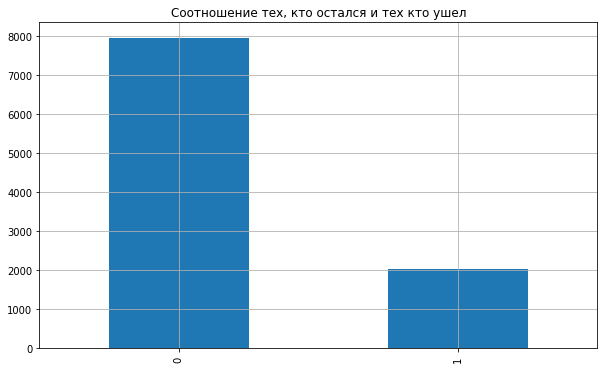

In [9]:
# Рисую гистограмму значений оттока и оставшихся клиентов
df['Exited'].value_counts().plot(kind='bar',grid=True,figsize=(10,6),title='Соотношение тех, кто остался и тех кто ушел');

Соотношение оттока и тех кто остался 1:4. Вывод: такое соотношение говорит, что присутствует дисбаланс в данных.

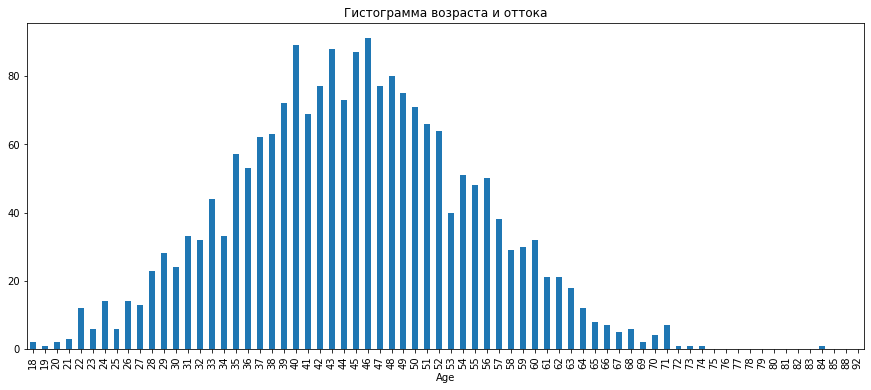

In [10]:
# Посмотрим как зависит возраст и отток клиентов 
df.groupby('Age')['Exited'].sum().plot(figsize=(15,6),kind='bar',title='Гистограмма возраста и оттока')
plt.show()

По гистограмме распределения видно, что отток зависит от возраста и распределено нормально. Больше всего уходит клиентов в возрасте от 40 до 50 лет.

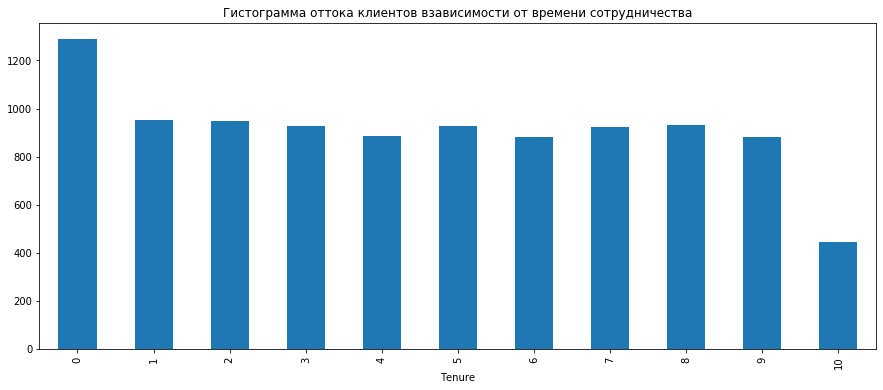

In [11]:
# Посмотрим как зависит наличие недвижимости и отток клиентов 
df.groupby('Tenure')['Exited'].count().plot(figsize=(15,6),kind='bar',title='Гистограмма оттока клиентов взависимости от времени сотрудничества')
plt.show()

На этой гисторгамме видна не очень сильная зависимость, но можно увидеть, что те кто сотрудничают с банком меньше года уходят больше всего.

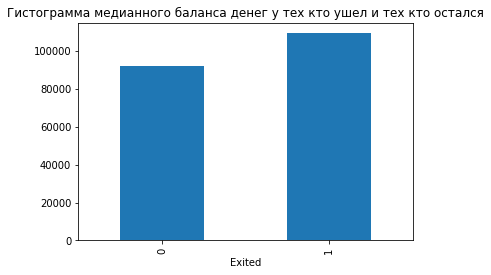

In [12]:
df.groupby('Exited')['Balance'].median().plot(kind='bar',title='Гистограмма медианного баланса денег у тех кто ушел и тех кто остался');

На гистограмме видно, что зависимость не сильная, но среднее значение баланса немного выше у тех кто ушел.

In [13]:
df.drop('Exited', axis = 1).corr()# Считаю корреляцию Пирсона

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
CreditScore,1.000000,-0.003965,0.003087,0.006268,0.012238,-0.005458,0.025651,-0.001384
Age,-0.003965,1.000000,-0.007368,0.028308,-0.030680,-0.011721,0.085472,-0.007201
Tenure,0.003087,-0.007368,1.000000,-0.005821,0.010106,0.021387,-0.025856,0.011225
Balance,0.006268,0.028308,-0.005821,1.000000,-0.304180,-0.014858,-0.010084,0.012797
NumOfProducts,0.012238,-0.030680,0.010106,-0.304180,1.000000,0.003183,0.009612,0.014204
HasCrCard,-0.005458,-0.011721,0.021387,-0.014858,0.003183,1.000000,-0.011866,-0.009933
IsActiveMember,0.025651,0.085472,-0.025856,-0.010084,0.009612,-0.011866,1.000000,-0.011421
EstimatedSalary,-0.001384,-0.007201,0.011225,0.012797,0.014204,-0.009933,-0.011421,1.000000


Видно, что все признаки не сильно коррелируются с целевым признаком.

One hot encoder
Избавляемся от категориальных признаков методом One hot encoder

In [14]:
df_ohe=pd.get_dummies(df,drop_first=True) # вызываем метод get_dummies для избавления от категориальных признаков

In [15]:
train_df, vnt_df = train_test_split(df_ohe, test_size=0.40, random_state=123456)
valid_df, test_df = train_test_split(vnt_df, test_size=0.50, random_state=123456)

print('Размер тренерующей выборки', train_df.shape[0])
print('Размер валидационной выборки', valid_df.shape[0])
print('Размер тестовой выборки', test_df.shape[0])

Размер тренерующей выборки 6000
Размер валидационной выборки 2000
Размер тестовой выборки 2000


In [16]:
train_features = train_df.drop(['Exited'], axis=1)
train_target = train_df['Exited']
valid_features = valid_df.drop(['Exited'], axis=1)
valid_target = valid_df['Exited']
test_features = test_df.drop(['Exited'], axis=1)
test_target = test_df['Exited']

### Строю модель без учета баланса

######  Обучение с помощью модели Дерево решения

In [17]:
%%time

best_depth = 0
best_f1 = 0

for depth in range(1,101):
    model_tree = DecisionTreeClassifier(random_state=1234, max_depth=depth)
    model_tree.fit(train_features, train_target)
    valid_predictions = model_tree.predict(valid_features)
    f1 = f1_score(valid_target, valid_predictions)
    print('Глубина дерева', depth,'F1', f1)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1

print('Лучшая глубина дерева', best_depth,'F1', best_f1)

Глубина дерева 1 F1 0.0
Глубина дерева 2 F1 0.5078864353312303
Глубина дерева 3 F1 0.530232558139535
Глубина дерева 4 F1 0.49501661129568103
Глубина дерева 5 F1 0.5057851239669422
Глубина дерева 6 F1 0.5414201183431953
Глубина дерева 7 F1 0.5446685878962537
Глубина дерева 8 F1 0.5459770114942529
Глубина дерева 9 F1 0.5384615384615384
Глубина дерева 10 F1 0.5405405405405406
Глубина дерева 11 F1 0.49586776859504134
Глубина дерева 12 F1 0.48183041722745623
Глубина дерева 13 F1 0.46887417218543054
Глубина дерева 14 F1 0.4838292367399742
Глубина дерева 15 F1 0.4763124199743918
Глубина дерева 16 F1 0.4741488020176545
Глубина дерева 17 F1 0.46666666666666673
Глубина дерева 18 F1 0.4613466334164588
Глубина дерева 19 F1 0.4574209245742092
Глубина дерева 20 F1 0.46987951807228917
Глубина дерева 21 F1 0.463030303030303
Глубина дерева 22 F1 0.463030303030303
Глубина дерева 23 F1 0.463030303030303
Глубина дерева 24 F1 0.463030303030303
Глубина дерева 25 F1 0.463030303030303
Глубина дерева 26 F1 0.4

######  Вывод: лучшее значение max_depth=8, при котором F1=0,545

######  Обучение с помощью модели Случайный лес

In [18]:
%%time

best_max_depth = 0
best_f1 = 0

for max_depth in range(1,40,1):
    model_forest=RandomForestClassifier(max_depth=max_depth,n_estimators=100,random_state=1234).fit(train_features,train_target)
    valid_predictions = model_forest.predict(valid_features)
    f1 = f1_score(valid_target, valid_predictions)
    print('Глубина дерева', max_depth,'F1:', f1)
    if f1 > best_f1:
        best_max_depth = max_depth
        best_f1 = f1

print('Лучшая глубина дерева', best_max_depth,'F1', best_f1)

Глубина дерева 1 F1: 0.0
Глубина дерева 2 F1: 0.17672413793103448
Глубина дерева 3 F1: 0.2180293501048218
Глубина дерева 4 F1: 0.3691148775894538
Глубина дерева 5 F1: 0.47368421052631576
Глубина дерева 6 F1: 0.48040885860306654
Глубина дерева 7 F1: 0.5016611295681063
Глубина дерева 8 F1: 0.5203252032520325
Глубина дерева 9 F1: 0.5211726384364821
Глубина дерева 10 F1: 0.5373608903020668
Глубина дерева 11 F1: 0.5333333333333333
Глубина дерева 12 F1: 0.5494505494505495
Глубина дерева 13 F1: 0.5443037974683544
Глубина дерева 14 F1: 0.547433903576983
Глубина дерева 15 F1: 0.5446153846153846
Глубина дерева 16 F1: 0.541795665634675
Глубина дерева 17 F1: 0.548238897396631
Глубина дерева 18 F1: 0.5457364341085272
Глубина дерева 19 F1: 0.5407066052227342
Глубина дерева 20 F1: 0.5446153846153846
Глубина дерева 21 F1: 0.5448916408668731
Глубина дерева 22 F1: 0.5434782608695652
Глубина дерева 23 F1: 0.5471406491499228
Глубина дерева 24 F1: 0.541213063763608
Глубина дерева 25 F1: 0.541213063763608
Г

###### Вывод: лучшее значение max_depth=12, при котором F1=0,549

Циклом подбираем гиперпораметр n_estimators (количество деревьев)

In [19]:
%%time

best_n_estimators = 0
best_f1 = 0

for estim in range(1,100,1):
    model_forest=RandomForestClassifier(max_depth=12, n_estimators=estim, random_state=1234).fit(train_features, train_target)
    valid_predictions = model_forest.predict(valid_features)
    f1 = f1_score(valid_target, valid_predictions)
    print('Количество деревьев', estim,'F1', f1)
    if f1 > best_f1:
        best_n_estimators = estim
        best_f1 = f1
print('Лучшее количество деревьев', best_n_estimators,'F1', best_f1)

Количество деревьев 1 F1 0.4673157162726008
Количество деревьев 2 F1 0.4376899696048632
Количество деревьев 3 F1 0.49028400597907323
Количество деревьев 4 F1 0.5098634294385432
Количество деревьев 5 F1 0.5177195685670262
Количество деревьев 6 F1 0.5138461538461538
Количество деревьев 7 F1 0.5208012326656395
Количество деревьев 8 F1 0.5108359133126935
Количество деревьев 9 F1 0.509375
Количество деревьев 10 F1 0.5047619047619046
Количество деревьев 11 F1 0.5181674565560822
Количество деревьев 12 F1 0.515625
Количество деревьев 13 F1 0.5181674565560822
Количество деревьев 14 F1 0.5235109717868338
Количество деревьев 15 F1 0.5235109717868338
Количество деревьев 16 F1 0.5206349206349207
Количество деревьев 17 F1 0.525984251968504
Количество деревьев 18 F1 0.5181674565560822
Количество деревьев 19 F1 0.5314465408805031
Количество деревьев 20 F1 0.5322834645669291
Количество деревьев 21 F1 0.5366614664586583
Количество деревьев 22 F1 0.5306122448979592
Количество деревьев 23 F1 0.53354134165

###### Вывод: лучшее значение max_depth=12 и n_estimators=36 при котором F1=0,552. Стало немного лучше.

###### Обучение с помощью модели Логистической регрессии

In [20]:
%%time

best_max_iter = 0
best_f1 = 0

for max_iter in range(1,50):
    model_reg = LogisticRegression(random_state=1234, max_iter=max_iter)
    model_reg.fit(train_features, train_target)
    valid_predictions = model_reg.predict(valid_features)
    f1 = f1_score(valid_target, valid_predictions)
    print('Количество итерраций', max_iter,'F1', f1)
    if f1 > best_f1:
        best_max_iter = max_iter
        best_f1 = f1

print('Лучшее количество итерраций', best_max_iter,'Лучшее F1', best_f1)

Количество итерраций 1 F1 0.0
Количество итерраций 2 F1 0.0
Количество итерраций 3 F1 0.0
Количество итерраций 4 F1 0.0
Количество итерраций 5 F1 0.0
Количество итерраций 6 F1 0.0
Количество итерраций 7 F1 0.0
Количество итерраций 8 F1 0.0
Количество итерраций 9 F1 0.0
Количество итерраций 10 F1 0.0
Количество итерраций 11 F1 0.0
Количество итерраций 12 F1 0.0
Количество итерраций 13 F1 0.0
Количество итерраций 14 F1 0.0
Количество итерраций 15 F1 0.0
Количество итерраций 16 F1 0.0
Количество итерраций 17 F1 0.009411764705882354
Количество итерраций 18 F1 0.009411764705882354
Количество итерраций 19 F1 0.009411764705882354
Количество итерраций 20 F1 0.09563409563409564
Количество итерраций 21 F1 0.08786610878661087
Количество итерраций 22 F1 0.08786610878661087
Количество итерраций 23 F1 0.08786610878661087
Количество итерраций 24 F1 0.08786610878661087
Количество итерраций 25 F1 0.08786610878661087
Количество итерраций 26 F1 0.08786610878661087
Количество итерраций 27 F1 0.08786610878

###### Лучшее количество итераций 20 лучшее F1 0,095

In [21]:
best_solver = ''
best_f1 = 0

for solve in {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}:
    model_reg = LogisticRegression(random_state=1234, solver=solve, max_iter=20).fit(train_features, train_target)
    valid_predictions = model_reg.predict(valid_features)
    f1 = f1_score(valid_target, valid_predictions)
    print('Solver', solve,'F1:', f1)
    if f1 > best_f1:
        best_solver= solve
        best_f1 = f1

print('Лучший solver', best_solver,'Лучшее f1', best_f1)

Solver newton-cg F1: 0.0
Solver saga F1: 0.0
Solver liblinear F1: 0.09563409563409564
Solver sag F1: 0.0
Solver lbfgs F1: 0.0
Лучший solver liblinear Лучшее f1 0.09563409563409564


###### Вывод: Лучший solver liblinear Лучшее f1 0.0956

###### Общий вывод:

Рассматривая данные с дисбалансом тремя моделями можно сделать вывод, что саммая лучшая модель оказалась Случайный лес. При лучшем значении max_depth=12, n_estimators = 30 мы имеем F1 меру =0,553 на тестовой(валидной) выборке.

## Борьба с дисбалансом

###### Воспользуемся функцией Upsampling и увеличим количество клиентов оттока(target==1)

In [22]:
## Функция Upsampling
def upsampling (features,target,repeat):
    #Разделяем выборку по значениям целевой функции
    target_one=target[target==1]
    target_null=target[target==0]
    features_one=features[target==1]
    features_null=features[target==0]
    
    #Увеличиваем и соединяем обратно
    upsampling_features=pd.concat([features_null]+[features_one]*repeat)
    upsampling_target=pd.concat([target_null]+[target_one]*repeat)
    
    # Перемешиваем
    upsampling_features,upsampling_target=shuffle(upsampling_features,upsampling_target, random_state=1234)
    
    return upsampling_features,upsampling_target

In [23]:
features_balance_up,target_balance_up=upsampling(train_features,train_target, 4)

###### Воспользуемся функцией Downsampling и увеличим количество клиентов оттока(target==1)

In [24]:
def downsampling(features,target,fraction):
    features_null=features[target==0]
    features_one=features[target==1]
    target_null=target[target==0]
    target_one=target[target==1]
    
    downsampling_features=pd.concat([features_null.sample(frac=0.4,random_state=1234)]+[features_one])
    downsampling_target=pd.concat([target_null.sample(frac=0.4,random_state=1234)]+[target_one])
    
    downsampling_features,downsampling_target=shuffle(downsampling_features,downsampling_target,random_state=1234)
    return downsampling_features,downsampling_target

In [25]:
features_balance_down,target_balance_down=downsampling(train_features,train_target,0.4)

## Тестирование модели

После балансирования данных. Обучение с помощью модели Дерево решения downsampling

In [26]:
%%time

best_depth = 0
best_f1 = 0

for depth in range(1,101):
    model_tree = DecisionTreeClassifier(random_state=1234, max_depth=depth)
    model_tree.fit(features_balance_down,target_balance_down)
    test_predictions = model_tree.predict(test_features)
    f1 = f1_score(test_target, test_predictions)
    print('Глубина дерева', depth,'F1', f1)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1

print('Лучшая глубина дерева', best_depth,'F1', best_f1)

Глубина дерева 1 F1 0.48911917098445595
Глубина дерева 2 F1 0.5051395007342144
Глубина дерева 3 F1 0.5350500715307582
Глубина дерева 4 F1 0.5573366214549939
Глубина дерева 5 F1 0.5701149425287356
Глубина дерева 6 F1 0.5783132530120482
Глубина дерева 7 F1 0.5585798816568047
Глубина дерева 8 F1 0.5733788395904438
Глубина дерева 9 F1 0.5308775731310943
Глубина дерева 10 F1 0.51931330472103
Глубина дерева 11 F1 0.5117227319062183
Глубина дерева 12 F1 0.4944944944944945
Глубина дерева 13 F1 0.4901574803149606
Глубина дерева 14 F1 0.5004926108374385
Глубина дерева 15 F1 0.47609756097560973
Глубина дерева 16 F1 0.4792899408284023
Глубина дерева 17 F1 0.48330058939096265
Глубина дерева 18 F1 0.4768339768339769
Глубина дерева 19 F1 0.4728682170542636
Глубина дерева 20 F1 0.48747591522158
Глубина дерева 21 F1 0.48747591522158
Глубина дерева 22 F1 0.48747591522158
Глубина дерева 23 F1 0.48747591522158
Глубина дерева 24 F1 0.48747591522158
Глубина дерева 25 F1 0.48747591522158
Глубина дерева 26 F1

###### Лучшая глубина дерева 6 F1 0.578

После балансирования данных. Обучение с помощью модели Дерево решения upsampling

In [27]:
%%time

best_depth = 0
best_f1 = 0

for depth in range(1,101):
    model_tree = DecisionTreeClassifier(random_state=1234, max_depth=depth)
    model_tree.fit(features_balance_up,target_balance_up)
    test_predictions = model_tree.predict(test_features)
    f1 = f1_score(test_target, test_predictions)
    print('Глубина дерева', depth,'F1', f1)
    if f1 > best_f1:
        best_depth = depth
        best_f1 = f1

print('Лучшая глубина дерева', best_depth,'F1', best_f1)

Глубина дерева 1 F1 0.48585365853658535
Глубина дерева 2 F1 0.5103969754253308
Глубина дерева 3 F1 0.5103969754253308
Глубина дерева 4 F1 0.5569143932267169
Глубина дерева 5 F1 0.5714285714285714
Глубина дерева 6 F1 0.5639589169000934
Глубина дерева 7 F1 0.5626690712353472
Глубина дерева 8 F1 0.5468306527909178
Глубина дерева 9 F1 0.526416906820365
Глубина дерева 10 F1 0.5239923224568138
Глубина дерева 11 F1 0.49017580144777656
Глубина дерева 12 F1 0.5151199165797706
Глубина дерева 13 F1 0.512486427795874
Глубина дерева 14 F1 0.5128779395296752
Глубина дерева 15 F1 0.514484356894554
Глубина дерева 16 F1 0.5219454329774614
Глубина дерева 17 F1 0.5102781136638451
Глубина дерева 18 F1 0.5103280680437424
Глубина дерева 19 F1 0.5073170731707316
Глубина дерева 20 F1 0.5
Глубина дерева 21 F1 0.49938195302843014
Глубина дерева 22 F1 0.49876543209876545
Глубина дерева 23 F1 0.49876543209876545
Глубина дерева 24 F1 0.49876543209876545
Глубина дерева 25 F1 0.49876543209876545
Глубина дерева 26 F1

###### Лучшая глубина дерева 5 F1 0.571

После балансирования данных. Обучение с помощью модели Случайного леса с использованием downsampling

In [28]:
%%time
best_max_depth = 0
best_f1 = 0
for max_depth in range (1,21,2):
    for estim in range(20,80,10):
        model_forest=RandomForestClassifier(max_depth=max_depth,n_estimators=estim,random_state=1234).fit(train_features,train_target)
        test_predictions = model_forest.predict(test_features)
        f1 = f1_score(test_target, test_predictions)
        print('Глубина дерева:', max_depth, ', количество деревьев:', estim,', F1:', f1)
        if f1 > best_f1:
            best_max_depth = max_depth
            best_n_estimators = estim
            best_f1 = f1
print('Лучшая глубина дерева', best_max_depth,'F1', best_f1)
print('Лучшее количество деревьев', best_n_estimators,'F1', best_f1)

Глубина дерева: 1 , количество деревьев: 20 , F1: 0.0
Глубина дерева: 1 , количество деревьев: 30 , F1: 0.0
Глубина дерева: 1 , количество деревьев: 40 , F1: 0.0
Глубина дерева: 1 , количество деревьев: 50 , F1: 0.0
Глубина дерева: 1 , количество деревьев: 60 , F1: 0.004962779156327543
Глубина дерева: 1 , количество деревьев: 70 , F1: 0.004962779156327543
Глубина дерева: 3 , количество деревьев: 20 , F1: 0.28451882845188287
Глубина дерева: 3 , количество деревьев: 30 , F1: 0.23326133909287255
Глубина дерева: 3 , количество деревьев: 40 , F1: 0.23605150214592274
Глубина дерева: 3 , количество деревьев: 50 , F1: 0.23605150214592274
Глубина дерева: 3 , количество деревьев: 60 , F1: 0.235042735042735
Глубина дерева: 3 , количество деревьев: 70 , F1: 0.2355460385438972
Глубина дерева: 5 , количество деревьев: 20 , F1: 0.49563699825479934
Глубина дерева: 5 , количество деревьев: 30 , F1: 0.4545454545454546
Глубина дерева: 5 , количество деревьев: 40 , F1: 0.46460980036297644
Глубина дерева: 

In [29]:
%%time
# Циклом ищем лучший гиперпораметр max_depth

best_max_depth = 0
best_f1 = 0

for max_depth in range(1,40,1):
    model_forest=RandomForestClassifier(class_weight='balanced',max_depth=max_depth, n_estimators=50, random_state=1234).fit(features_balance_down,target_balance_down)
    test_predictions = model_forest.predict(test_features)
    f1 = f1_score(test_target, test_predictions)
    print('Глубина дерева', max_depth,'F1:', f1)
    if f1 > best_f1:
        best_max_depth = max_depth
        best_f1 = f1

print('Лучшая глубина дерева', best_max_depth,'F1', best_f1)

Глубина дерева 1 F1: 0.5570093457943925
Глубина дерева 2 F1: 0.5568400770712909
Глубина дерева 3 F1: 0.585513078470825
Глубина дерева 4 F1: 0.5866141732283464
Глубина дерева 5 F1: 0.5817825661116551
Глубина дерева 6 F1: 0.5985247629083246
Глубина дерева 7 F1: 0.6006191950464396
Глубина дерева 8 F1: 0.6030042918454935
Глубина дерева 9 F1: 0.6117647058823529
Глубина дерева 10 F1: 0.6021978021978023
Глубина дерева 11 F1: 0.5914221218961625
Глубина дерева 12 F1: 0.5844748858447488
Глубина дерева 13 F1: 0.5972222222222222
Глубина дерева 14 F1: 0.6049237983587338
Глубина дерева 15 F1: 0.5947867298578199
Глубина дерева 16 F1: 0.5905420991926182
Глубина дерева 17 F1: 0.6023809523809524
Глубина дерева 18 F1: 0.5925925925925926
Глубина дерева 19 F1: 0.5978391356542618
Глубина дерева 20 F1: 0.6035928143712576
Глубина дерева 21 F1: 0.6096385542168674
Глубина дерева 22 F1: 0.6
Глубина дерева 23 F1: 0.5959475566150177
Глубина дерева 24 F1: 0.5959475566150177
Глубина дерева 25 F1: 0.5959475566150177


######  Лучшая глубина дерева 9 F1 0.611 при использовании Downsampling.

###### После балансирования данных. Обучение с помощью модели Случайного леса с использованием Upsampling

In [30]:
%%time
# Циклом ищем лучший гиперпораметр max_depth

best_max_depth = 0
best_f1 = 0

for max_depth in range(1,40,1):
    model_forest=RandomForestClassifier(class_weight='balanced',max_depth=max_depth, random_state=1234).fit(features_balance_up,target_balance_up)
    test_predictions = model_forest.predict(test_features)
    f1 = f1_score(test_target, test_predictions)
    print('Глубина дерева', max_depth,'F1:', f1)
    if f1 > best_f1:
        best_max_depth = max_depth
        best_f1 = f1

print('Лучшая глубина дерева', best_max_depth,'F1', best_f1)

Глубина дерева 1 F1: 0.533457249070632
Глубина дерева 2 F1: 0.5700293829578844
Глубина дерева 3 F1: 0.5685071574642127
Глубина дерева 4 F1: 0.5877551020408163
Глубина дерева 5 F1: 0.5803108808290156
Глубина дерева 6 F1: 0.5959271168274384
Глубина дерева 7 F1: 0.5884907709011943
Глубина дерева 8 F1: 0.5788923719958202
Глубина дерева 9 F1: 0.5865490628445424
Глубина дерева 10 F1: 0.5736607142857142
Глубина дерева 11 F1: 0.576512455516014
Глубина дерева 12 F1: 0.5696969696969697
Глубина дерева 13 F1: 0.5773447015834349
Глубина дерева 14 F1: 0.5692307692307692
Глубина дерева 15 F1: 0.5657894736842105
Глубина дерева 16 F1: 0.5405405405405406
Глубина дерева 17 F1: 0.5539280958721704
Глубина дерева 18 F1: 0.546742209631728
Глубина дерева 19 F1: 0.5561797752808989
Глубина дерева 20 F1: 0.5480225988700564
Глубина дерева 21 F1: 0.5670816044260027
Глубина дерева 22 F1: 0.5558659217877094
Глубина дерева 23 F1: 0.5646067415730337
Глубина дерева 24 F1: 0.5654596100278552
Глубина дерева 25 F1: 0.5564

###### Лучшая глубина дерева 6 F1 0.595

In [46]:
%%time
# Циклом подбираем гиперпораметр n_estimators (количество деревьев)

best_n_estimators = 0
best_f1 = 0

for estim in range(1,100,1):
    model_forest=RandomForestClassifier(class_weight='balanced', max_depth=6, n_estimators=estim, random_state=1234).fit(features_balance_up,target_balance_up)
    test_predictions = model_forest.predict(test_features)
    f1 = f1_score(test_target, test_predictions)
    print('Количество деревьев', estim,'F1', f1)
    if f1 > best_f1:
        best_n_estimators = estim
        best_f1 = f1
print('Лучшее количество деревьев', best_n_estimators,'F1', best_f1)

Количество деревьев 1 F1 0.48064806480648065
Количество деревьев 2 F1 0.5805825242718446
Количество деревьев 3 F1 0.5750487329434698
Количество деревьев 4 F1 0.579476861167002
Количество деревьев 5 F1 0.595482546201232
Количество деревьев 6 F1 0.5871559633027523
Количество деревьев 7 F1 0.6002098635886673
Количество деревьев 8 F1 0.6031413612565445
Количество деревьев 9 F1 0.5976267529665588
Количество деревьев 10 F1 0.5959271168274384
Количество деревьев 11 F1 0.6
Количество деревьев 12 F1 0.5823834196891191
Количество деревьев 13 F1 0.5899581589958158
Количество деревьев 14 F1 0.5786163522012578
Количество деревьев 15 F1 0.5799793601651186
Количество деревьев 16 F1 0.5835929387331256
Количество деревьев 17 F1 0.5877466251298027
Количество деревьев 18 F1 0.5852631578947368
Количество деревьев 19 F1 0.5870020964360588
Количество деревьев 20 F1 0.5851619644723093
Количество деревьев 21 F1 0.5893416927899686
Количество деревьев 22 F1 0.5838509316770186
Количество деревьев 23 F1 0.5838509

###### Лучшее количество деревьев 78 с глубиной дерева 6 F1 0.604

In [32]:
model_forest=RandomForestClassifier(class_weight='balanced',max_depth=8,n_estimators=28,random_state=1234).fit(features_balance_up,target_balance_up)

###### После балансирования данных. Обучение с помощью модели Логистической регрессии

In [47]:
%%time
model_logistic=LogisticRegression(class_weight='balanced',solver='liblinear').fit(features_balance_up,target_balance_up)
prediction=model_logistic.predict(valid_features)
print('F1:',f1_score(valid_target,prediction))

F1: 0.439344262295082
CPU times: user 92.7 ms, sys: 40.3 ms, total: 133 ms
Wall time: 79 ms


###### Вывод: Мера F1 поменялась. Стала гораздо лучше. F1=0.439

###### Исследование метрика AUC-ROC

Рисуем ROC для логистической регрессии

In [34]:
probabilities_tree=model_tree.predict_proba(valid_features)
probabilities_one_valid_tree=probabilities_tree[:,1]
fpr_tree,tpr_tree,thresholds=roc_curve(valid_target,probabilities_one_valid_tree)

In [35]:
auc_roc_tree=roc_auc_score(valid_target,probabilities_one_valid_tree)

In [36]:
auc_roc_tree

0.6886879305131635

In [37]:
probabilities_forest=model_forest.predict_proba(valid_features)
probabilities_one_valid_forest=probabilities_forest[:,1]
fpr_forest,tpr_forest,thresholds=roc_curve(valid_target,probabilities_one_valid_forest)

In [38]:
auc_roc_forest=roc_auc_score(valid_target,probabilities_one_valid_forest)

In [39]:
auc_roc_forest

0.8693714564225531

In [40]:
probabilities_reg=model_logistic.predict_proba(valid_features)
probabilities_one_valid_reg=probabilities_reg[:,1]
fpr_log,tpr_log,thresholds=roc_curve(valid_target,probabilities_one_valid_reg)

In [41]:
auc_roc_reg=roc_auc_score(valid_target,probabilities_one_valid_reg)

In [42]:
auc_roc_reg

0.5750700629852323

<Figure size 432x288 with 0 Axes>

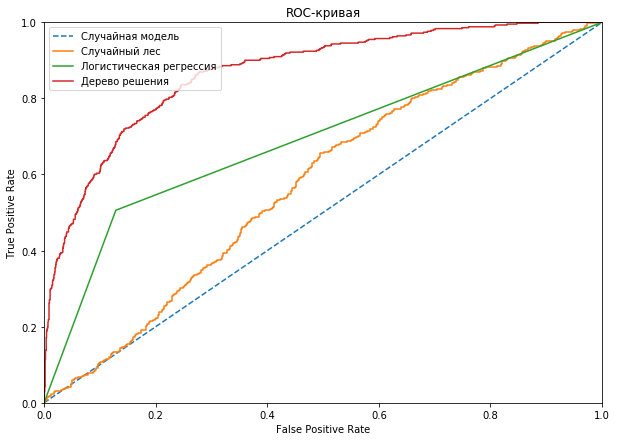

In [43]:
plt.figure()

plt.figure(figsize=(10,7))
plt.plot([0, 1], [0, 1], linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.plot(fpr_log,tpr_log)
plt.plot(fpr_tree,tpr_tree)
plt.plot(fpr_forest,tpr_forest)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.legend(('Случайная модель','Случайный лес','Логистическая регрессия','Дерево решения'),
           loc= 'upper left') 
plt.show()

Общий вывод:

In [48]:
rezult1={'Дерево Решения':np.array([0.545,0.578]),'Случайный лес':np.array([0.552,0.604]),'Логистическая регрессия':np.array([0.095,0.439])}
rezult_df=pd.DataFrame(rezult1,index=['F1 без учета дисбаланса','F1 с учетом дисбаланса'])

In [49]:
rezult_df

,Дерево Решения,Случайный лес,Логистическая регрессия
F1 без учета дисбаланса,0.545,0.552,0.095
F1 с учетом дисбаланса,0.578,0.604,0.439


### Общий вывод: Рассматривая данные с учетом дисбаланса + переведенные категориальные и без учета дисбаланса тремя моделями можно сделать вывод, что самая лучшая модель оказалась Случайный лес. При лучшем значении max_depth=6,n_estimators=78, мы имеем F1 меру =0,604 на тестовой(валидной) выборке. Хуже всего себя показала модель Логистическая регрессия